# EDA on Video Games Sales Dataset 

### Dataset Info


Alongside the fields: Name, Platform, Year_of_Release, Genre, Publisher, NA_Sales, EU_Sales, JP_Sales, Other_Sales, Global_Sales

we have:-

Critic_score - Aggregate score compiled by Metacritic staff

Critic_count - The number of critics used in coming up with the Critic_score

User_score - Score by Metacritic's subscribers

User_count - Number of users who gave the user_score

Developer - Party responsible for creating the game

Rating - The ESRB ratings

Dataset Link = https://www.kaggle.com/datasets/sidtwr/videogames-sales-dataset?select=Video_Games_Sales_as_at_22_Dec_2016.csv

## Objectives -

1. Market Analysis 

= Identify trends in popular gaming platforms and genres to inform market strategies for game developers and publishers.

= Analyze regional sales patterns to tailor marketing and distribution strategies based on geographical preferences.

2. Marketing Strategy Optimization 

= Analyze the impact of critic and user scores on global sales to optimize marketing strategies and focus on games with higher potential for success.

3. Time-Series Analysis 

= Explore the evolution of the gaming industry over time, identifying periods of growth, stagnation, or decline

4. Risk Assessment for Investors 

= Provide insights for investors interested in the gaming industry by assessing the risk associated with investing in specific platforms, genres, or publishers.

5. Competitor Analysis 

= Compare the performance of different game developers and publishers, identifying strengths, weaknesses, and areas for improvement.

6. Platform Lifecycle Analysis 

= Understand the life cycle of gaming platforms, identifying when they peak in popularity and when new platforms start gaining traction.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use('ggplot')

In [2]:
#load the video games dataset
sales = pd.read_csv(r"C:\Users\Lenovo\Downloads\Video_Games_Sales_as_at_22_Dec_2016.csv\Video_Games_Sales_as_at_22_Dec_2016.csv")

In [3]:
sales.head()

,Name,Platform,Year_of_Release,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales,Critic_Score,Critic_Count,User_Score,User_Count,Developer,Rating
0,Wii Sports,Wii,2006.0,Sports,Nintendo,41.36,28.96,3.77,8.45,82.53,76.0,51.0,8.0,322.0,Nintendo,E
1,Super Mario Bros.,NES,1985.0,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24,NaN,NaN,NaN,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,15.68,12.76,3.79,3.29,35.52,82.0,73.0,8.3,709.0,Nintendo,E
3,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,15.61,10.93,3.28,2.95,32.77,80.0,73.0,8.0,192.0,Nintendo,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37,NaN,NaN,NaN,NaN,NaN,NaN


In [4]:
sales["Developer"].value_counts()

Ubisoft                                     204
EA Sports                                   172
EA Canada                                   167
Konami                                      162
Capcom                                      139
EA Tiburon                                  108
Electronic Arts                             104
Ubisoft Montreal                            101
Visual Concepts                              99
Omega Force                                  80
Traveller's Tales                            77
Vicarious Visions                            76
Activision                                   75
TT Games                                     73
Nintendo                                     72
THQ                                          71
Namco                                        64
Codemasters                                  62
Artificial Mind and Movement                 61
Midway                                       60
Yuke's                                  

In [5]:
# load the video games company region dataset

region = pd.read_csv(r"C:\Users\Lenovo\Downloads\video-games-developers.csv")
region.head()

,Developer,City,Administrative division,Country,Est.,"Notable games, series or franchises",Notes
0,0verflow,Tokyo,NaN,Japan,1997,School DaysSummer DaysCross Days,Visual Novel brand (both developer and publisher)
1,11 bit studios,Warsaw,Masovian Voivodeship,Poland,2010,Frostpunk,Indie developer/publisher
2,1C Company,Moscow,NaN,Russia,1991,King's Bounty: Warriors of the North,Game localization. The game development subsid...
3,1-Up Studio,Tokyo,NaN,Japan,2000,Mother 3,Subsidiary of Nintendo. Formed by former emplo...
4,2K Czech,Brno,NaN,Czech Republic,1997,MafiaMafia II,Former subsidiary of 2K Games; previously know...


In [6]:
region.columns

Index(['Developer', 'City', 'Administrative division', 'Country', 'Est.',
       'Notable games, series or franchises', 'Notes'],
      dtype='object')

In [7]:
len(region.columns)

7

In [8]:
region["Country"].value_counts()

United States                                        231
Japan                                                149
United Kingdom                                        73
France                                                23
Canada                                                21
Germany                                               19
Sweden                                                17
South Korea                                           13
Poland                                                13
China                                                 11
Russia                                                11
Australia                                             11
Finland                                               10
Denmark                                                7
Czech Republic                                         6
Netherlands                                            6
Ukraine                                                6
Spain                          

### Merging the two datasets 

In [9]:
# merge the city column in video game sales dataset

games = pd.merge(sales, region[['Developer', 'Country']], left_on='Publisher', right_on='Developer', how='left', suffixes=('_left', '_right'))


In [10]:
games.drop('Developer_right', axis=1, inplace=True)
games.rename(columns={'Developer_left': 'Developer'}, inplace=True)

In [11]:
games

,Name,Platform,Year_of_Release,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales,Critic_Score,Critic_Count,User_Score,User_Count,Developer,Rating,Country
0,Wii Sports,Wii,2006.0,Sports,Nintendo,41.36,28.96,3.77,8.45,82.53,76.0,51.0,8.0,322.0,Nintendo,E,Japan
1,Super Mario Bros.,NES,1985.0,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24,NaN,NaN,NaN,NaN,NaN,NaN,Japan
2,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,15.68,12.76,3.79,3.29,35.52,82.0,73.0,8.3,709.0,Nintendo,E,Japan
3,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,15.61,10.93,3.28,2.95,32.77,80.0,73.0,8.0,192.0,Nintendo,E,Japan
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37,NaN,NaN,NaN,NaN,NaN,NaN,Japan
5,Tetris,GB,1989.0,Puzzle,Nintendo,23.20,2.26,4.22,0.58,30.26,NaN,NaN,NaN,NaN,NaN,NaN,Japan
6,New Super Mario Bros.,DS,2006.0,Platform,Nintendo,11.28,9.14,6.50,2.88,29.80,89.0,65.0,8.5,431.0,Nintendo,E,Japan
7,Wii Play,Wii,2006.0,Misc,Nintendo,13.96,9.18,2.93,2.84,28.92,58.0,41.0,6.6,129.0,Nintendo,E,Japan
8,New Super Mario Bros. Wii,Wii,2009.0,Platform,Nintendo,14.44,6.94,4.70,2.24,28.32,87.0,80.0,8.4,594.0,Nintendo,E,Japan
9,Duck Hunt,NES,1984.0,Shooter,Nintendo,26.93,0.63,0.28,0.47,28.31,NaN,NaN,NaN,NaN,NaN,NaN,Japan


In [12]:
games.columns

Index(['Name', 'Platform', 'Year_of_Release', 'Genre', 'Publisher', 'NA_Sales',
       'EU_Sales', 'JP_Sales', 'Other_Sales', 'Global_Sales', 'Critic_Score',
       'Critic_Count', 'User_Score', 'User_Count', 'Developer', 'Rating',
       'Country'],
      dtype='object')

In [13]:
games.tail(10)

,Name,Platform,Year_of_Release,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales,Critic_Score,Critic_Count,User_Score,User_Count,Developer,Rating,Country
16709,15 Days,PC,2009.0,Adventure,DTP Entertainment,0.00,0.01,0.00,0.0,0.01,63.0,6.0,5.8,8.0,DTP Entertainment,NaN,NaN
16710,Men in Black II: Alien Escape,GC,2003.0,Shooter,Infogrames,0.01,0.00,0.00,0.0,0.01,NaN,NaN,NaN,NaN,Atari,T,NaN
16711,Aiyoku no Eustia,PSV,2014.0,Misc,dramatic create,0.00,0.00,0.01,0.0,0.01,NaN,NaN,NaN,NaN,NaN,NaN,NaN
16712,Woody Woodpecker in Crazy Castle 5,GBA,2002.0,Platform,Kemco,0.01,0.00,0.00,0.0,0.01,NaN,NaN,NaN,NaN,NaN,NaN,NaN
16713,SCORE International Baja 1000: The Official Game,PS2,2008.0,Racing,Activision,0.00,0.00,0.00,0.0,0.01,NaN,NaN,NaN,NaN,NaN,NaN,United States
16714,Samurai Warriors: Sanada Maru,PS3,2016.0,Action,Tecmo Koei,0.00,0.00,0.01,0.0,0.01,NaN,NaN,NaN,NaN,NaN,NaN,NaN
16715,LMA Manager 2007,X360,2006.0,Sports,Codemasters,0.00,0.01,0.00,0.0,0.01,NaN,NaN,NaN,NaN,NaN,NaN,United Kingdom
16716,Haitaka no Psychedelica,PSV,2016.0,Adventure,Idea Factory,0.00,0.00,0.01,0.0,0.01,NaN,NaN,NaN,NaN,NaN,NaN,Japan
16717,Spirits & Spells,GBA,2003.0,Platform,Wanadoo,0.01,0.00,0.00,0.0,0.01,NaN,NaN,NaN,NaN,NaN,NaN,NaN
16718,Winning Post 8 2016,PSV,2016.0,Simulation,Tecmo Koei,0.00,0.00,0.01,0.0,0.01,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [14]:
games.shape

(16719, 17)

In [15]:
games.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16719 entries, 0 to 16718
Data columns (total 17 columns):
Name               16717 non-null object
Platform           16719 non-null object
Year_of_Release    16450 non-null float64
Genre              16717 non-null object
Publisher          16665 non-null object
NA_Sales           16719 non-null float64
EU_Sales           16719 non-null float64
JP_Sales           16719 non-null float64
Other_Sales        16719 non-null float64
Global_Sales       16719 non-null float64
Critic_Score       8137 non-null float64
Critic_Count       8137 non-null float64
User_Score         7590 non-null float64
User_Count         7590 non-null float64
Developer          10096 non-null object
Rating             9950 non-null object
Country            9268 non-null object
dtypes: float64(10), object(7)
memory usage: 2.3+ MB


### Setting video games names as index

In [16]:
games.set_index("Name", inplace = True)

In [17]:
games.sort_index().head()

,Platform,Year_of_Release,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales,Critic_Score,Critic_Count,User_Score,User_Count,Developer,Rating,Country
Name,,,,,,,,,,,,,,,,
Beyblade Burst,3DS,2016.0,Role-Playing,FuRyu,0.00,0.00,0.03,0.00,0.03,NaN,NaN,NaN,NaN,NaN,NaN,Japan
Fire Emblem Fates,3DS,2015.0,Role-Playing,Nintendo,0.81,0.23,0.52,0.11,1.68,NaN,NaN,NaN,NaN,NaN,NaN,Japan
Frozen: Olaf's Quest,DS,2013.0,Platform,Disney Interactive Studios,0.21,0.26,0.00,0.04,0.52,NaN,NaN,NaN,NaN,NaN,NaN,United States
Frozen: Olaf's Quest,3DS,2013.0,Platform,Disney Interactive Studios,0.27,0.27,0.00,0.05,0.60,NaN,NaN,NaN,NaN,NaN,NaN,United States
Haikyu!! Cross Team Match!,3DS,2016.0,Adventure,Namco Bandai Games,0.00,0.00,0.04,0.00,0.04,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [18]:
games.sort_values("Global_Sales", ascending = False).head()


,Platform,Year_of_Release,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales,Critic_Score,Critic_Count,User_Score,User_Count,Developer,Rating,Country
Name,,,,,,,,,,,,,,,,
Wii Sports,Wii,2006.0,Sports,Nintendo,41.36,28.96,3.77,8.45,82.53,76.0,51.0,8.0,322.0,Nintendo,E,Japan
Super Mario Bros.,NES,1985.0,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24,NaN,NaN,NaN,NaN,NaN,NaN,Japan
Mario Kart Wii,Wii,2008.0,Racing,Nintendo,15.68,12.76,3.79,3.29,35.52,82.0,73.0,8.3,709.0,Nintendo,E,Japan
Wii Sports Resort,Wii,2009.0,Sports,Nintendo,15.61,10.93,3.28,2.95,32.77,80.0,73.0,8.0,192.0,Nintendo,E,Japan
Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37,NaN,NaN,NaN,NaN,NaN,NaN,Japan


### counting missing vales 

In [19]:
games.isnull().sum()

Platform              0
Year_of_Release     269
Genre                 2
Publisher            54
NA_Sales              0
EU_Sales              0
JP_Sales              0
Other_Sales           0
Global_Sales          0
Critic_Score       8582
Critic_Count       8582
User_Score         9129
User_Count         9129
Developer          6623
Rating             6769
Country            7451
dtype: int64

### Observation on missing values
so there are many NULL values in the dataset but let's handel some missing values that we can.

there are different methods to handel missing values based on datatype also

1. genre = there are only 2 missing values so we can replace them using mode value 

In [20]:
games['Genre'].fillna(games['Genre'].mode()[0], inplace=True)

2. Publisher = Impute missing Publisher values based on information from other columns. For example, use the most common publisher for games with the same genre or platform.

In [21]:
games['Publisher'] = games.groupby('Genre')['Publisher'].transform(lambda x: x.fillna(x.mode()[0]))

In [22]:
games["Publisher"].value_counts()

Electronic Arts                           1360
Activision                                 993
Ubisoft                                    964
Namco Bandai Games                         945
Konami Digital Entertainment               834
THQ                                        715
Nintendo                                   707
Sony Computer Entertainment                687
Sega                                       638
Take-Two Interactive                       422
Capcom                                     386
Atari                                      367
Tecmo Koei                                 348
Warner Bros. Interactive Entertainment     235
Square Enix                                234
Disney Interactive Studios                 218
Unknown                                    201
Midway Games                               198
Eidos Interactive                          198
505 Games                                  191
Microsoft Game Studios                     191
Acclaim Enter

In [23]:
games[["Publisher","Developer","Country"]]

,Publisher,Developer,Country
Name,,,
Wii Sports,Nintendo,Nintendo,Japan
Super Mario Bros.,Nintendo,NaN,Japan
Mario Kart Wii,Nintendo,Nintendo,Japan
Wii Sports Resort,Nintendo,Nintendo,Japan
Pokemon Red/Pokemon Blue,Nintendo,NaN,Japan
Tetris,Nintendo,NaN,Japan
New Super Mario Bros.,Nintendo,Nintendo,Japan
Wii Play,Nintendo,Nintendo,Japan
New Super Mario Bros. Wii,Nintendo,Nintendo,Japan


3. Country =  for this the vales are basd on the publisher so we can change the null values if we found publishing companies country 

In [24]:
games['Country'] = games.apply(lambda row: 'Japan' if row['Publisher'] == 'Namco Bandai Games' and pd.isnull(row['Country']) else row['Country'], axis=1)

In [25]:
games[games["Publisher"]=="Deep Silver"]


,Platform,Year_of_Release,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales,Critic_Score,Critic_Count,User_Score,User_Count,Developer,Rating,Country
Name,,,,,,,,,,,,,,,,
Dead Island,X360,2011.0,Action,Deep Silver,1.48,0.69,0.00,0.20,2.37,71.0,75.0,6.9,627.0,Techland,M,NaN
Dead Island,PS3,2011.0,Action,Deep Silver,1.08,0.73,0.15,0.31,2.27,71.0,41.0,6.6,405.0,Techland,M,NaN
Saints Row IV,X360,2013.0,Action,Deep Silver,1.01,0.50,0.01,0.13,1.66,81.0,42.0,6.5,325.0,Volition Inc.,M,NaN
Jillian Michaels' Fitness Ultimatum 2009,Wii,2008.0,Sports,Deep Silver,0.96,0.20,0.00,0.11,1.27,30.0,4.0,2.0,23.0,3G Studios,E,NaN
Saints Row IV,PS3,2013.0,Action,Deep Silver,0.56,0.41,0.09,0.19,1.25,76.0,26.0,6.3,278.0,Volition Inc.,M,NaN
Dead Island: Riptide,X360,2013.0,Action,Deep Silver,0.44,0.26,0.01,0.07,0.78,57.0,43.0,6.3,192.0,Techland,M,NaN
Catherine,PS3,2011.0,Adventure,Deep Silver,0.30,0.14,0.20,0.06,0.70,79.0,61.0,8.1,372.0,Atlus,M,NaN
Metro: Last Light,PS4,2014.0,Action,Deep Silver,0.22,0.30,0.04,0.10,0.66,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Sacred 2: Fallen Angel,PS3,2009.0,Role-Playing,Deep Silver,0.22,0.22,0.08,0.09,0.61,70.0,45.0,7.1,51.0,"Ascaron Entertainment GmbH, Ascaron Entertainment",M,NaN


In [26]:
games['Country'] = games.apply(lambda row: 'United States' if row['Publisher'] == 'Take-Two Interactive' and pd.isnull(row['Country']) else row['Country'], axis=1)

In [27]:
#games.loc[(games['Publisher'] == 'Electronic Arts') & (games['Country'] == 'Japan'), 'Country'] = 'United States'

In [28]:
games['Country'] = games.apply(lambda row: 'Japan' if row['Publisher'] == 'Tecmo Koei' and pd.isnull(row['Country']) else row['Country'], axis=1)

In [29]:
games['Country'] = games.apply(lambda row: 'United Kingdom' if row['Publisher'] == 'Eidos Interactive' and pd.isnull(row['Country']) else row['Country'], axis=1)

In [30]:
games['Country'] = games.apply(lambda row: 'United States' if row['Publisher'] == 'Microsoft Game Studios' and pd.isnull(row['Country']) else row['Country'], axis=1)

In [31]:
games['Country'] = games.apply(lambda row: 'Europe' if row['Publisher'] == '505 Games' and pd.isnull(row['Country']) else row['Country'], axis=1)

In [32]:
games['Country'] = games.apply(lambda row: 'Japan' if row['Publisher'] == 'D3Publisher' and pd.isnull(row['Country']) else row['Country'], axis=1)

In [33]:
games['Country'] = games.apply(lambda row: 'United States' if row['Publisher'] == 'Vivendi Games' and pd.isnull(row['Country']) else row['Country'], axis=1)

In [34]:
games['Country'] = games.apply(lambda row: 'Germany' if row['Publisher'] == 'Deep Silver' and pd.isnull(row['Country']) else row['Country'], axis=1)

In [35]:
games['Country'] = games.apply(lambda row: 'United Kingdom' if row['Publisher'] == 'Zoo Digital Publishing' and pd.isnull(row['Country']) else row['Country'], axis=1)

In [36]:
games.isnull().sum()

Platform              0
Year_of_Release     269
Genre                 0
Publisher             0
NA_Sales              0
EU_Sales              0
JP_Sales              0
Other_Sales           0
Global_Sales          0
Critic_Score       8582
Critic_Count       8582
User_Score         9129
User_Count         9129
Developer          6623
Rating             6769
Country            4583
dtype: int64

In [37]:
games["Country"].value_counts()

United States     6715
Japan             3504
Europe            1124
United Kingdom     555
Germany            155
France              69
South Korea          7
Russia               3
Norway               2
Czech Republic       2
Name: Country, dtype: int64

#### Result of missing values 
1. reduced genre and publisher column values to zero 
2. reduced country missing values from 7451 to 4583

In [38]:
selected_columns = ['Publisher']
result = games.loc[games.index[81:111], selected_columns]

result

,Publisher
Name,
FIFA Soccer 13,Electronic Arts
FIFA Soccer 13,Electronic Arts
FIFA Soccer 13,Electronic Arts
FIFA Soccer 13,Electronic Arts
FIFA Soccer 13,Electronic Arts
FIFA Soccer 13,Electronic Arts
FIFA Soccer 13,Electronic Arts
FIFA Soccer 13,Electronic Arts
GoldenEye 007,Nintendo


In [39]:
# checking data types 
games.dtypes
# all datatypes are correct

Platform            object
Year_of_Release    float64
Genre               object
Publisher           object
NA_Sales           float64
EU_Sales           float64
JP_Sales           float64
Other_Sales        float64
Global_Sales       float64
Critic_Score       float64
Critic_Count       float64
User_Score         float64
User_Count         float64
Developer           object
Rating              object
Country             object
dtype: object

In [40]:
# getting some useful insights of flot datatype columns
games.describe()

,Year_of_Release,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales,Critic_Score,Critic_Count,User_Score,User_Count
count,16450.000000,16719.000000,16719.000000,16719.000000,16719.000000,16719.000000,8137.000000,8137.000000,7590.000000,7590.000000
mean,2006.487356,0.263330,0.145025,0.077602,0.047332,0.533543,68.967679,26.360821,7.125046,162.229908
std,5.878995,0.813514,0.503283,0.308818,0.186710,1.547935,13.938165,18.980495,1.500006,561.282326
min,1980.000000,0.000000,0.000000,0.000000,0.000000,0.010000,13.000000,3.000000,0.000000,4.000000
25%,2003.000000,0.000000,0.000000,0.000000,0.000000,0.060000,60.000000,12.000000,6.400000,10.000000
50%,2007.000000,0.080000,0.020000,0.000000,0.010000,0.170000,71.000000,21.000000,7.500000,24.000000
75%,2010.000000,0.240000,0.110000,0.040000,0.030000,0.470000,79.000000,36.000000,8.200000,81.000000
max,2020.000000,41.360000,28.960000,10.220000,10.570000,82.530000,98.000000,113.000000,9.700000,10665.000000


In [41]:
games.shape

(16719, 16)

### Finding Top 5 Highest Global Sales of games

In [42]:
games.sort_values("Global_Sales", ascending = False).head()

,Platform,Year_of_Release,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales,Critic_Score,Critic_Count,User_Score,User_Count,Developer,Rating,Country
Name,,,,,,,,,,,,,,,,
Wii Sports,Wii,2006.0,Sports,Nintendo,41.36,28.96,3.77,8.45,82.53,76.0,51.0,8.0,322.0,Nintendo,E,Japan
Super Mario Bros.,NES,1985.0,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24,NaN,NaN,NaN,NaN,NaN,NaN,Japan
Mario Kart Wii,Wii,2008.0,Racing,Nintendo,15.68,12.76,3.79,3.29,35.52,82.0,73.0,8.3,709.0,Nintendo,E,Japan
Wii Sports Resort,Wii,2009.0,Sports,Nintendo,15.61,10.93,3.28,2.95,32.77,80.0,73.0,8.0,192.0,Nintendo,E,Japan
Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37,NaN,NaN,NaN,NaN,NaN,NaN,Japan


### Finding information of specific game

In [43]:
games.loc[["Grand Theft Auto V"]]

,Platform,Year_of_Release,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales,Critic_Score,Critic_Count,User_Score,User_Count,Developer,Rating,Country
Name,,,,,,,,,,,,,,,,
Grand Theft Auto V,PS3,2013.0,Action,Take-Two Interactive,7.02,9.09,0.98,3.96,21.04,97.0,50.0,8.2,3994.0,Rockstar North,M,United States
Grand Theft Auto V,X360,2013.0,Action,Take-Two Interactive,9.66,5.14,0.06,1.41,16.27,97.0,58.0,8.1,3711.0,Rockstar North,M,United States
Grand Theft Auto V,PS4,2014.0,Action,Take-Two Interactive,3.96,6.31,0.38,1.97,12.61,97.0,66.0,8.3,2899.0,Rockstar North,M,United States
Grand Theft Auto V,XOne,2014.0,Action,Take-Two Interactive,2.81,2.19,0.00,0.47,5.48,97.0,14.0,7.9,764.0,Rockstar North,M,United States
Grand Theft Auto V,PC,2015.0,Action,Take-Two Interactive,0.39,0.69,0.00,0.09,1.17,96.0,57.0,7.9,3756.0,Rockstar North,M,United States


In [44]:
games.iloc[[111]] #finding which game is at sr.no. 111

,Platform,Year_of_Release,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales,Critic_Score,Critic_Count,User_Score,User_Count,Developer,Rating,Country
Name,,,,,,,,,,,,,,,,
Super Smash Bros. Melee,GC,2001.0,Fighting,Nintendo,4.41,1.04,1.39,0.22,7.07,92.0,38.0,9.1,568.0,HAL Labs,T,Japan


In [45]:
games.loc[["Grand Theft Auto V"], ["Global_Sales", "User_Score","Country"]]

,Global_Sales,User_Score,Country
Name,,,
Grand Theft Auto V,21.04,8.2,United States
Grand Theft Auto V,16.27,8.1,United States
Grand Theft Auto V,12.61,8.3,United States
Grand Theft Auto V,5.48,7.9,United States
Grand Theft Auto V,1.17,7.9,United States


In [46]:
games.iloc[[1600], games.columns.get_indexer(["Global_Sales", "Country","User_Score"])]

,Global_Sales,Country,User_Score
Name,,,
Tom Clancy's Splinter Cell: Pandora Tomorrow,1.25,Europe,8.6


### count the unique genre

In [47]:
games["Genre"].unique()

array(['Sports', 'Platform', 'Racing', 'Role-Playing', 'Puzzle', 'Misc',
       'Shooter', 'Simulation', 'Action', 'Fighting', 'Adventure',
       'Strategy'], dtype=object)

In [48]:
games["Genre"].nunique()

12

In [49]:
games["Genre"].value_counts()

Action          3372
Sports          2348
Misc            1750
Role-Playing    1500
Shooter         1323
Adventure       1303
Racing          1249
Platform         888
Simulation       874
Fighting         849
Strategy         683
Puzzle           580
Name: Genre, dtype: int64

### Count the number of games released each year


In [50]:
yearly_game_counts = games['Year_of_Release'].value_counts().sort_index()
yearly_game_counts

1980.0       9
1981.0      46
1982.0      36
1983.0      17
1984.0      14
1985.0      14
1986.0      21
1987.0      16
1988.0      15
1989.0      17
1990.0      16
1991.0      41
1992.0      43
1993.0      62
1994.0     121
1995.0     219
1996.0     263
1997.0     289
1998.0     379
1999.0     338
2000.0     350
2001.0     482
2002.0     829
2003.0     775
2004.0     762
2005.0     939
2006.0    1006
2007.0    1197
2008.0    1427
2009.0    1426
2010.0    1255
2011.0    1136
2012.0     653
2013.0     544
2014.0     581
2015.0     606
2016.0     502
2017.0       3
2020.0       1
Name: Year_of_Release, dtype: int64

In [51]:
max_year = yearly_game_counts.idxmax()
max_year

2008.0

In [52]:
max_count = yearly_game_counts.max()
max_count

1427

Observation = so the year 2008 has maximum games released wich are 1427

Plotting the above observation

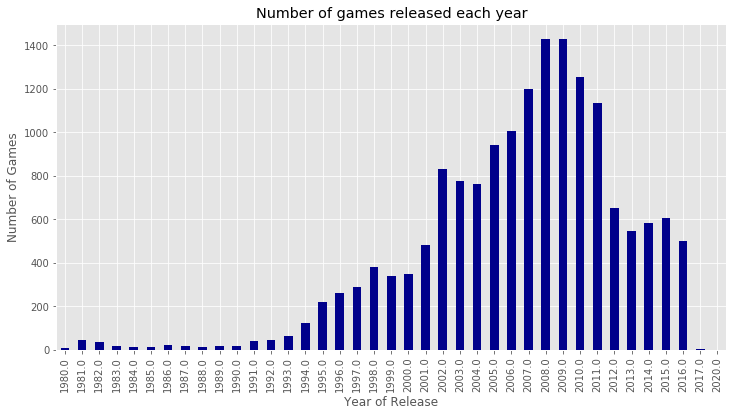

In [53]:
plt.figure(figsize=(12,6))
yearly_game_counts.plot(kind = 'bar', color = 'darkblue')
plt.title("Number of games released each year")
plt.xlabel("Year of Release")
plt.ylabel("Number of Games")
plt.show()

### Sales Distribution Analysis

In [91]:
saless = games["Country"].value_counts()
saless

United States     6715
Japan             3504
Europe            1124
United Kingdom     555
Germany            155
France              69
South Korea          7
Russia               3
Norway               2
Czech Republic       2
Name: Country, dtype: int64

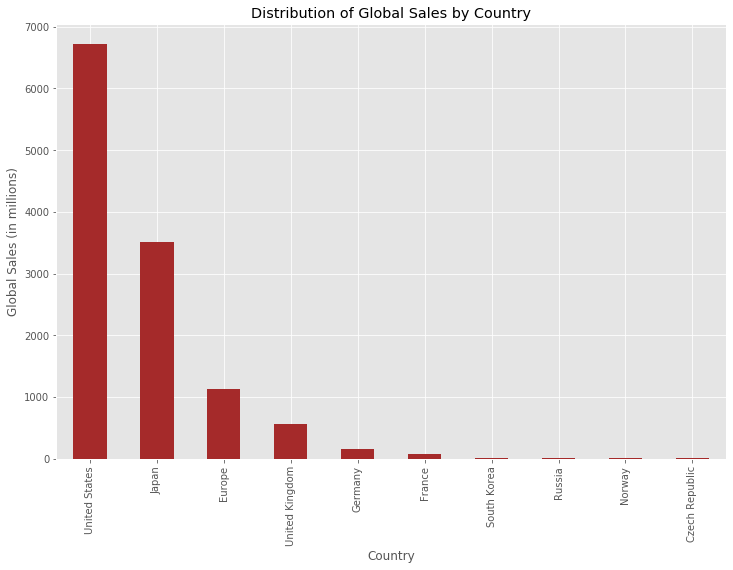

In [97]:
plt.figure(figsize = (12,8))
saless.plot(kind = "Bar", color = 'brown')
#sns.barplot(x =Global_Sales , y = saless, palette = "viridis")
plt.title("Distribution of Global Sales by Country")
plt.xlabel("Country")
plt.ylabel("Global Sales (in millions)")
plt.show()

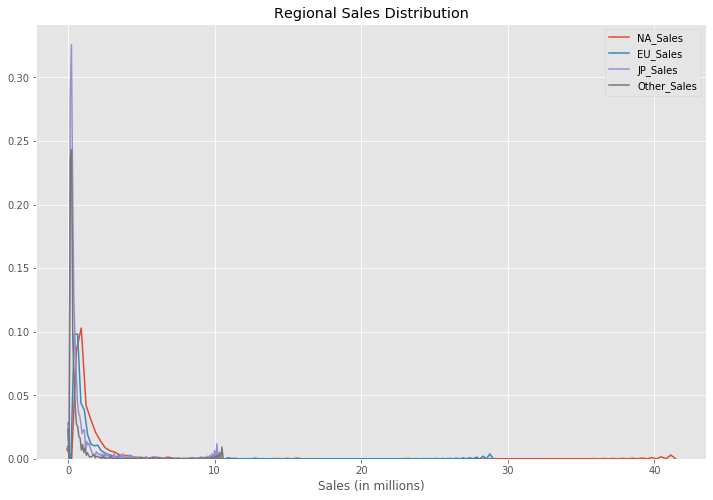

In [68]:
# Regional sales analysis
regions = ['NA_Sales', 'EU_Sales', 'JP_Sales', 'Other_Sales']
plt.figure(figsize=(12, 8))
for region in regions:
    sns.kdeplot(games[region], label=region)
plt.title('Regional Sales Distribution')
plt.xlabel('Sales (in millions)')
plt.legend()
plt.show()

### Platform & Genre Analysis 

### Finding famous genre according to global sales

In [54]:
genre_global_sales = games.groupby("Genre")["Global_Sales"].sum().sort_values(ascending = False)
genre_global_sales

Genre
Action          1747.69
Sports          1332.00
Shooter         1052.94
Role-Playing     934.40
Platform         828.08
Misc             803.18
Racing           728.90
Fighting         447.48
Simulation       390.42
Puzzle           243.02
Adventure        237.69
Strategy         174.50
Name: Global_Sales, dtype: float64

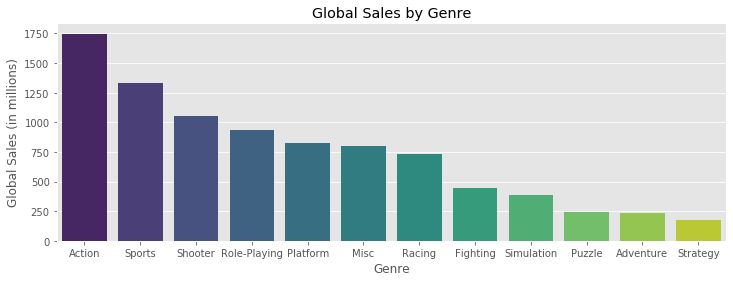

In [58]:
plt.figure(figsize = (12,4))
sns.barplot(x =genre_global_sales.index, y = genre_global_sales.values, palette = "viridis")
plt.title("Global Sales by Genre")
plt.xlabel("Genre")
plt.ylabel("Global Sales (in millions)")
plt.show()

### Top 5 Gaming Genres

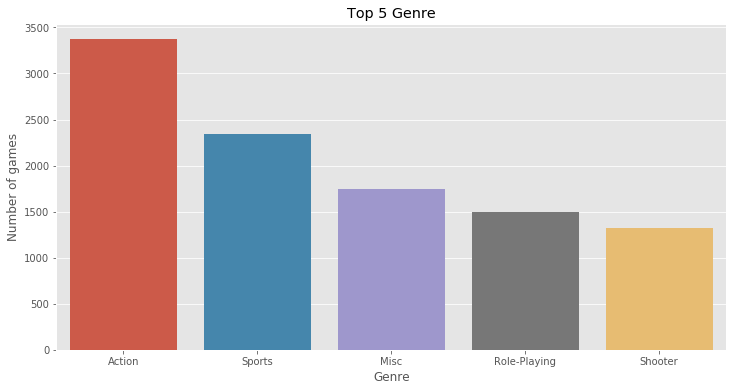

In [60]:
plt.figure(figsize= (12,6))
sns.countplot( x= "Genre" , data = games, order = games["Genre"].value_counts().index[:5])
plt.title("Top 5 Genre")
plt.xlabel("Genre")
plt.ylabel("Number of games")
plt.show()

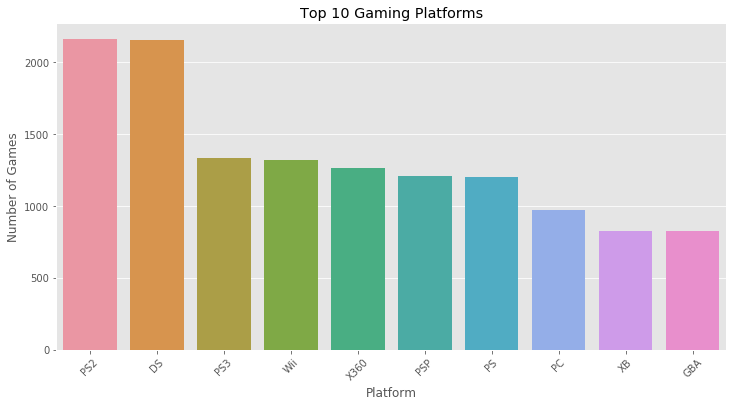

In [62]:
# Most popular gaming platforms
plt.figure(figsize=(12, 6))
sns.countplot(x='Platform', data=games, order=games['Platform'].value_counts().index[:10])
plt.title('Top 10 Gaming Platforms')
plt.xlabel('Platform')
plt.ylabel('Number of Games')
plt.xticks(rotation=45)
plt.show()


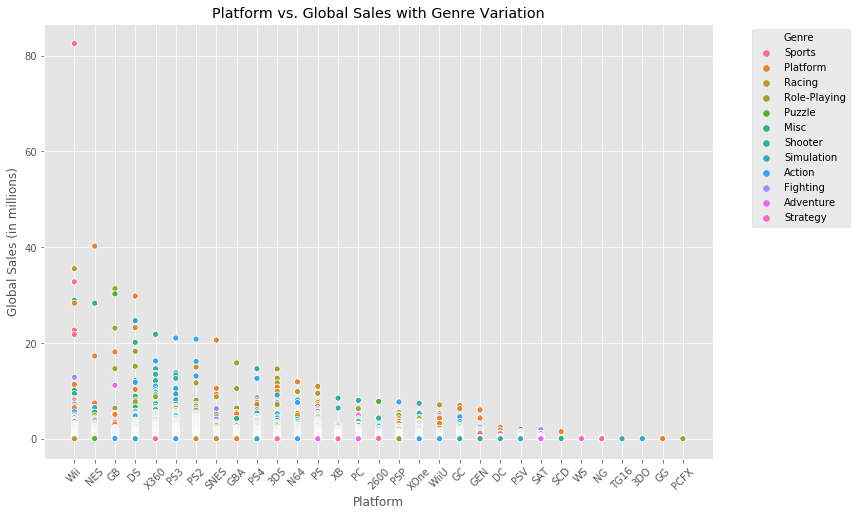

In [64]:
# Relationship between platform, genre, and global sales
plt.figure(figsize=(12, 8))
sns.scatterplot(x='Platform', y='Global_Sales', hue='Genre', data=games)
plt.title('Platform vs. Global Sales with Genre Variation')
plt.xlabel('Platform')
plt.ylabel('Global Sales (in millions)')
plt.xticks(rotation=45)
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()

## Time Trends

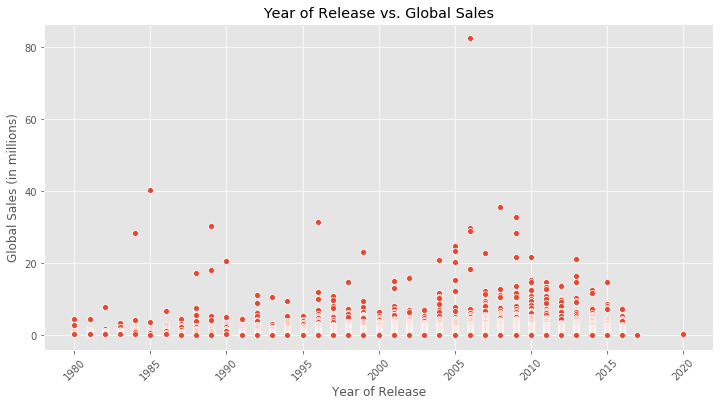

In [77]:
# Correlation between year of release and global sales
plt.figure(figsize=(12, 6))
sns.scatterplot(x='Year_of_Release', y='Global_Sales', data=games)
plt.title('Year of Release vs. Global Sales')
plt.xlabel('Year of Release')
plt.ylabel('Global Sales (in millions)')
plt.xticks(rotation=45)
plt.show()

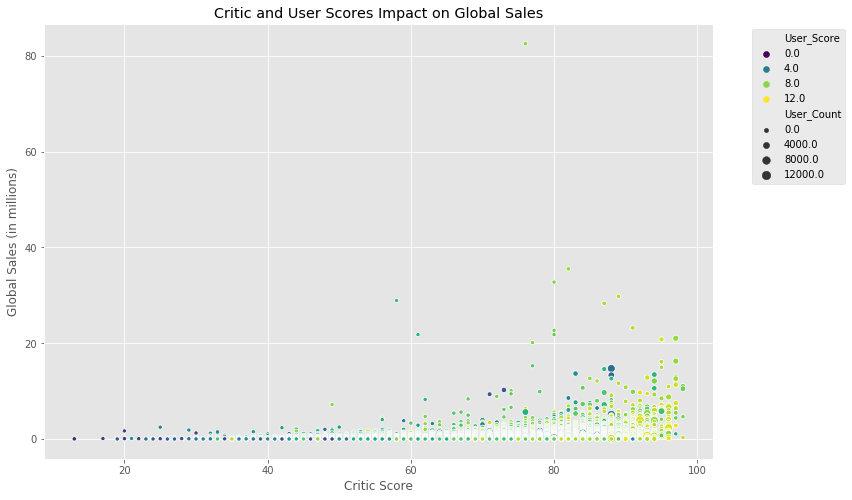

In [80]:
# Correlation between critic scores, user scores, and global sales
plt.figure(figsize=(12, 8))
sns.scatterplot(x='Critic_Score', y='Global_Sales', data=games, hue='User_Score', palette='viridis', size='User_Count')
plt.title('Critic and User Scores Impact on Global Sales')
plt.xlabel('Critic Score')
plt.ylabel('Global Sales (in millions)')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()

In [82]:
platform_lifecycle = games.groupby(['Platform', 'Year_of_Release']).agg({'Global_Sales': 'sum'}).reset_index()

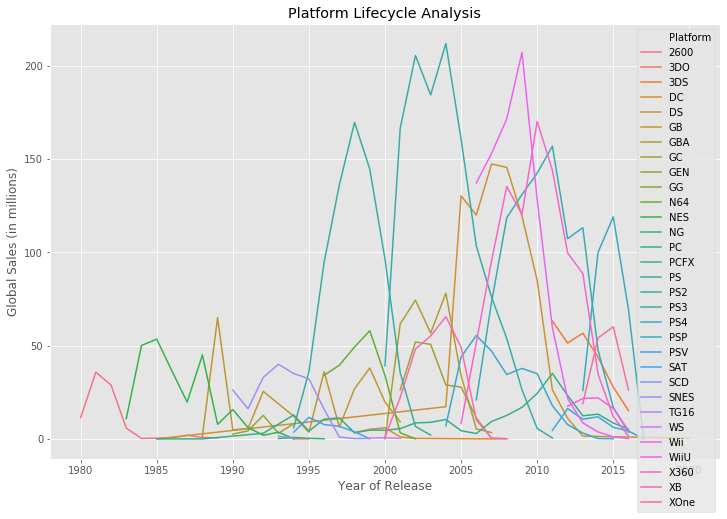

In [83]:

plt.figure(figsize=(12, 8))
sns.lineplot(x='Year_of_Release', y='Global_Sales', hue='Platform', data=platform_lifecycle)
plt.title('Platform Lifecycle Analysis')
plt.xlabel('Year of Release')
plt.ylabel('Global Sales (in millions)')
plt.show()

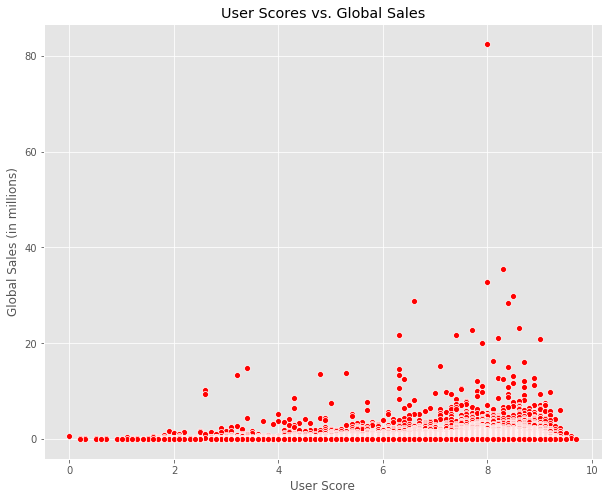

In [99]:
plt.figure(figsize=(10, 8))
sns.scatterplot(x='User_Score', y='Global_Sales', data=games, color='red')
plt.title('User Scores vs. Global Sales')
plt.xlabel('User Score')
plt.ylabel('Global Sales (in millions)')
plt.show()

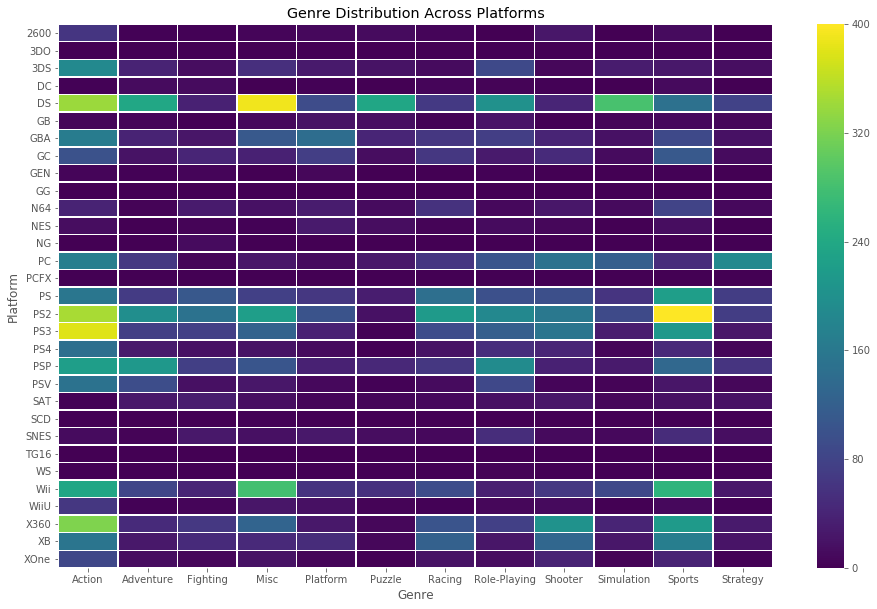

In [102]:

genre_platform_pivot = games.pivot_table(index='Platform', columns='Genre', aggfunc='size', fill_value=0)

# Create a heatmap
plt.figure(figsize=(16, 10))
sns.heatmap(genre_platform_pivot, cmap='viridis', linewidths=.5)
plt.title('Genre Distribution Across Platforms')
plt.xlabel('Genre')
plt.ylabel('Platform')
plt.show()

In [115]:
games["Publisher"].value_counts().nlargest()

Electronic Arts                 1360
Activision                       993
Ubisoft                          964
Namco Bandai Games               945
Konami Digital Entertainment     834
Name: Publisher, dtype: int64

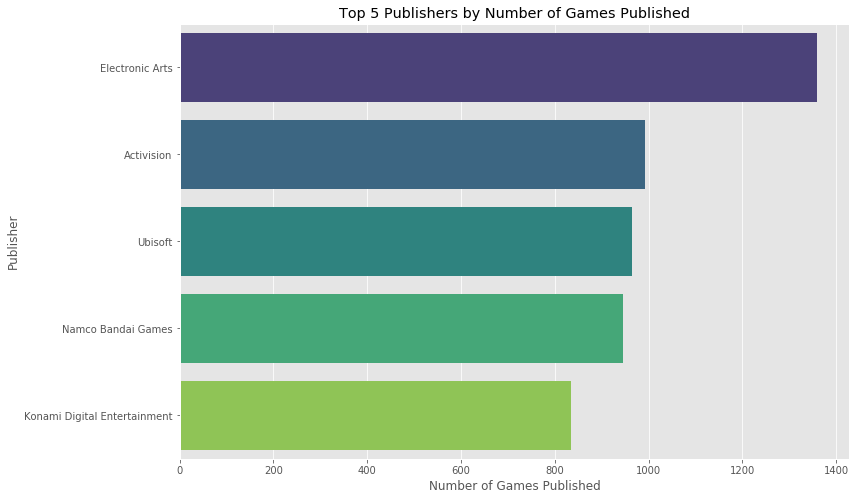

In [114]:
plt.figure(figsize=(12, 8))
top_publishers = games['Publisher'].value_counts().nlargest(5)
sns.barplot(x=top_publishers.values, y=top_publishers.index, palette='viridis')
plt.title('Top 5 Publishers by Number of Games Published')
plt.xlabel('Number of Games Published')
plt.ylabel('Publisher')
plt.show()

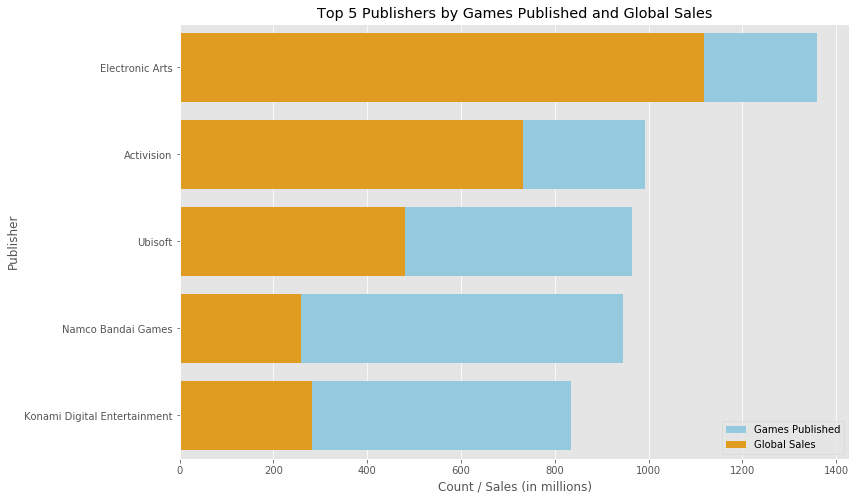

In [110]:
# Calculate the number of games published by each publisher
games_published = games['Publisher'].value_counts()

# Calculate the total global sales for each publisher
global_sales_by_publisher = games.groupby('Publisher')['Global_Sales'].sum()

# Merge the two series into a DataFrame
publisher_stats = pd.DataFrame({
    'Games_Published': games_published,
    'Global_Sales': global_sales_by_publisher
})

# Sort the DataFrame by number of games published and select the top 5
top_publishers = publisher_stats.sort_values(by='Games_Published', ascending=False).head(5)

# Create a bar plot for the top 5 publishers by the number of games published and global sales
plt.figure(figsize=(12, 8))
sns.barplot(x=top_publishers['Games_Published'], y=top_publishers.index, label='Games Published', color='skyblue')
sns.barplot(x=top_publishers['Global_Sales'], y=top_publishers.index, label='Global Sales', color='orange')
plt.title('Top 5 Publishers by Games Published and Global Sales')
plt.xlabel('Count / Sales (in millions)')
plt.ylabel('Publisher')
plt.legend()
plt.show()

### Findings / conclusion

1. There is not enough data on the developer 
2. Action games genre has the most global sales and action games are played mostly on the PS3 & DS platform.
3. United States, Japan & Europe has the selled the most of the game sworldwide respectively.
4. Games sales really started to peak-up in the year 2002.
5. if you want publish your game you may want to consider 'Electronic Arts' & 'Activison'.